In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
%matplotlib inline
import scipy.optimize as opt


In [2]:
archivo = 'absorbancia_0m.csv'
data = pd.read_csv(archivo)
data


,Consecutivo,tiempo,Absorbancia
0,1,0,1.09
1,2,5,1.17
2,3,10,1.10
3,4,15,1.12
4,5,20,0.70
5,6,25,0.56
6,7,30,0.59
7,8,35,0.69
8,9,40,0.45
9,10,45,0.37


In [3]:
x = data.iloc[:,0]
y = data.iloc[:,2]


In [4]:
# Definimos funcion objetivo y semilla
def fun_obj(beta,x,y,n):
    return np.sum((y-beta.dot([x**i for i in range(n+1)]))**2)

In [5]:
b01 = np.zeros(2)
ajuste1 = opt.minimize(fun_obj, b01, args=(x,y,1))
b02 = np.zeros(3)
ajuste2 = opt.minimize(fun_obj, b02, args=(x,y,2))
b03 = np.zeros(4)
ajuste3 = opt.minimize(fun_obj, b03, args=(x,y,3))
b04 = np.zeros(5)

In [6]:
ajuste1

      fun: 0.5317819420299894
 hess_inv: array([[ 0.08876812, -0.00543478],
       [-0.00543478,  0.00043478]])
      jac: array([-4.47034836e-08,  2.98023224e-08])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([ 0.99539891, -0.03916525])

In [7]:
ajuste2

      fun: 0.229333759575579
 hess_inv: array([[ 2.23351529e-01, -3.63581283e-02,  1.23527083e-03],
       [-3.63581283e-02,  7.56330655e-03, -2.85046485e-04],
       [ 1.23527083e-03, -2.85046485e-04,  1.14016610e-05]])
      jac: array([ 7.39470124e-07,  3.19629908e-06, -2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 45
      nit: 7
     njev: 9
   status: 0
  success: True
        x: array([ 1.27987136, -0.10481273,  0.0026259 ])

In [8]:
ajuste3

      fun: 0.207792050699059
 hess_inv: array([[ 4.64337301e-01, -1.41207120e-01,  1.15056527e-02,
        -2.73865886e-04],
       [-1.41207120e-01,  5.34008224e-02, -4.77827628e-03,
         1.19824620e-04],
       [ 1.15056527e-02, -4.77827628e-03,  4.51910581e-04,
        -1.17477900e-05],
       [-2.73865886e-04,  1.19824620e-04, -1.17477900e-05,
         3.13303260e-07]])
      jac: array([-0.00232075, -0.00913222, -0.05183149,  0.00312597])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 456
      nit: 7
     njev: 74
   status: 2
  success: False
        x: array([ 1.38421630e+00, -1.50398784e-01,  7.09487068e-03, -1.19195363e-04])

In [9]:
xpoints = x
ypoints = y
yhat1 = (ajuste1.x[0]+ajuste1.x[1]*xpoints)
yhat2 = (ajuste2.x[0]+ajuste2.x[1]*xpoints+ajuste2.x[2]*(xpoints**2))
yhat3 = (ajuste3.x[0]+ajuste3.x[1]*xpoints+ajuste3.x[2]*(xpoints**2)+ajuste3.x[3]*(xpoints**3))

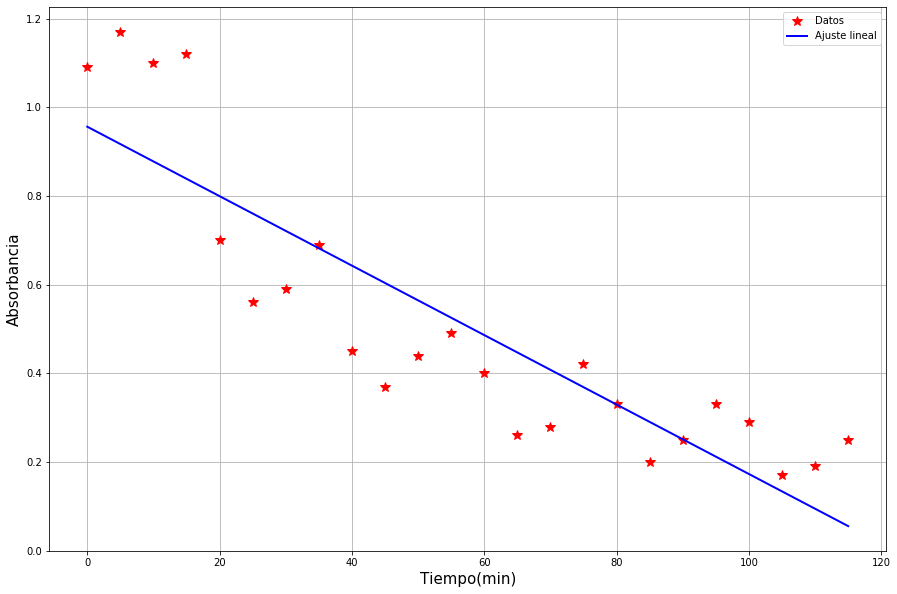

In [10]:
plt.figure(figsize=(15,10))
plt.plot((x*5-5), ypoints, 'r*', ms=10, label='Datos')
plt.plot((x*5-5), yhat1, 'b', lw=2, label='Ajuste lineal')
#plt.plot((x*5-5), yhat2, 'k', lw=2, label='Ajuste 2')
#plt.plot((x*5-5), yhat3, 'g', lw=2, label='Ajuste 3')
plt.grid()
plt.xlabel('Tiempo(min)', fontsize=15)
plt.ylabel('Absorbancia', fontsize=15)
plt.legend(loc='best')

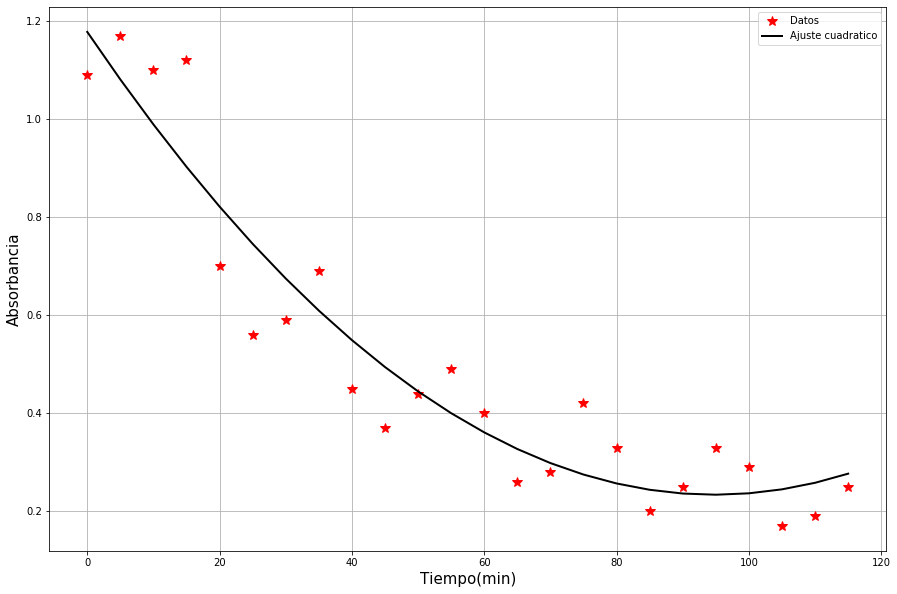

In [11]:
plt.figure(figsize=(15,10))
plt.plot((x*5-5), ypoints, 'r*', ms=10, label='Datos')
#plt.plot((x*5-5), yhat1, 'b', lw=2, label='Ajuste 1')
plt.plot((x*5-5), yhat2, 'k', lw=2, label='Ajuste cuadratico')
#plt.plot((x*5-5), yhat3, 'g', lw=2, label='Ajuste 3')
plt.grid()
plt.xlabel('Tiempo(min)', fontsize=15)
plt.ylabel('Absorbancia', fontsize=15)
plt.legend(loc='best')

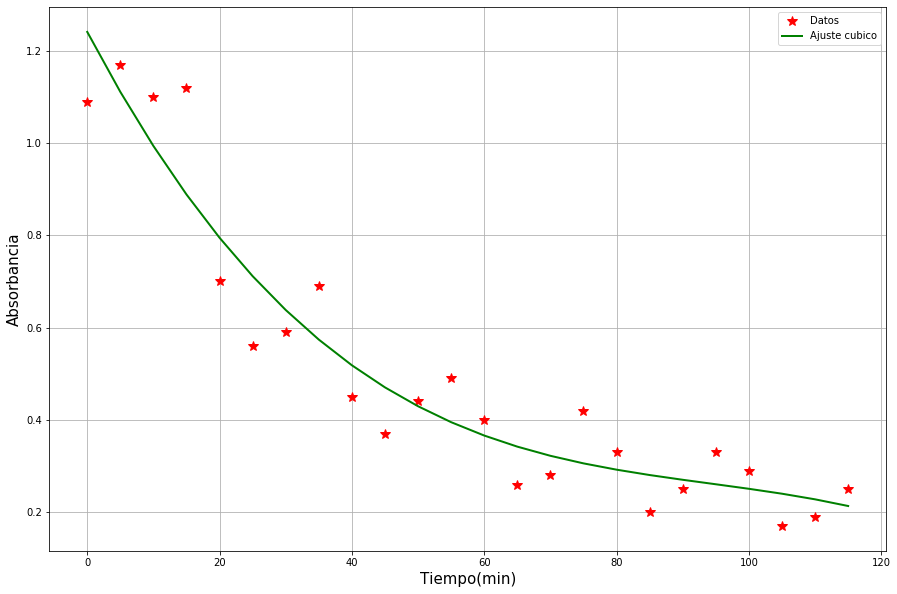

In [12]:
plt.figure(figsize=(15,10))
plt.plot((x*5-5), ypoints, 'r*', ms=10, label='Datos')
#plt.plot((x*5-5), yhat1, 'b', lw=2, label='Ajuste 1')
#plt.plot((x*5-5), yhat2, 'k', lw=2, label='Ajuste 2')
plt.plot((x*5-5), yhat3, 'g', lw=2, label='Ajuste cubico')
plt.grid()
plt.xlabel('Tiempo(min)', fontsize=15)
plt.ylabel('Absorbancia', fontsize=15)
plt.legend(loc='best')

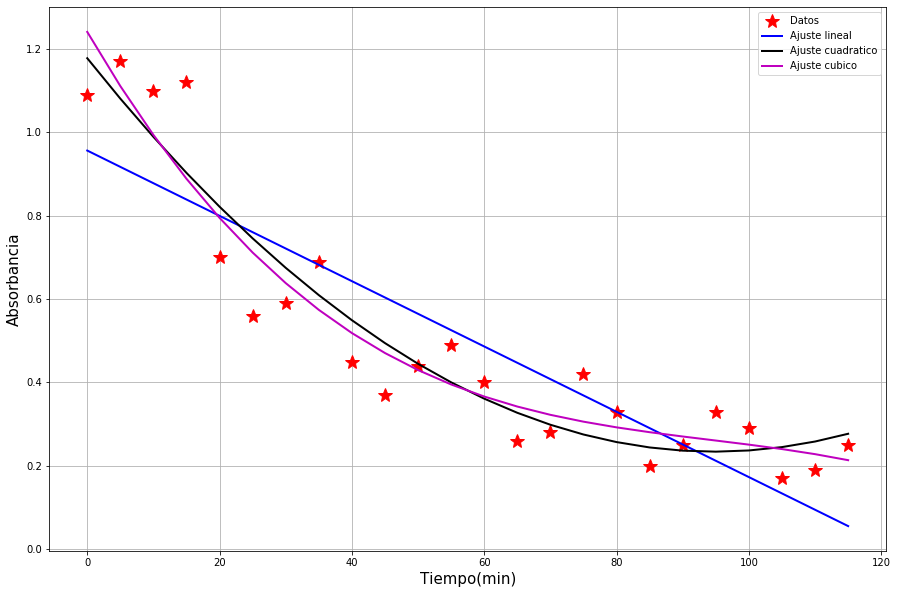

In [13]:
plt.figure(figsize=(15,10))
plt.plot((x*5-5), ypoints, 'r*', ms=15, label='Datos')
plt.plot((x*5-5), yhat1, 'b', lw=2, label='Ajuste lineal')
plt.plot((x*5-5), yhat2, 'k', lw=2, label='Ajuste cuadratico')
plt.plot((x*5-5), yhat3, 'm', lw=2, label='Ajuste cubico')
plt.grid()
plt.xlabel('Tiempo(min)', fontsize=15)
plt.ylabel('Absorbancia', fontsize=15)
plt.legend(loc='best')

In [14]:
yhat2=beta2.dot([x**i for i in range (3)])
# Graficar
plt.figure(figsize=(15,10))
plt.plot((x*5-5),y, "pb",ms=10, label="puntos")
#plt.plot((x*5-5),yhat2,"k", lw=3, label="polinomio grado 3")
plt.xlabel('Tiempo (min)')
plt.ylabel('Absorbancia')

plt.grid()
plt.legend(loc='best')
plt.show()



NameError: name 'beta2' is not defined

In [ ]:
error = [ajuste1.fun, ajuste2.fun, ajuste3.fun]
plt.figure(figsize=(8,6))
plt.plot(range(1,4), error, 'ko', ms=10)
plt.xlabel('Orden del polinomio', fontsize=15)
plt.ylabel('Error', fontsize=15)

In [16]:
yhat3[10]

0.4296599922790127